In [1]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import lightgbm as lgb

In [2]:
train_data = pd.read_csv('./train_noclean.csv')
test_data = pd.read_csv('./test_noclean.csv')

y_train = train_data.loc[:,'price']
train_data = train_data.drop(columns='price')
num_features = len(train_data.columns)
features = list(train_data.columns[2:num_features])
X_train = train_data.loc[:,features]

features = list(test_data.columns[2:num_features])

X_test = test_data.loc[:,features]
test_labels = test_data.loc[:,'id']

test_labels = test_labels.to_frame()

In [3]:
def run_model(X_train, y_train, learn, max_depth, num_class, num_leaves, min_data_in_leaf, rounds):
    params={}
    params['learning_rate']=0.03
    params['boosting_type']='gbdt' #GradientBoostingDecisionTree
    params['objective']='multiclass' #Multi-class target feature
    params['metric']='multi_error' #metric for multi-class
    params['max_depth']=max_depth
    params['num_class']=num_class
    params['num_leaves']=num_leaves
    clf=lgb.train(params,d_train,rounds)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

kf = KFold(n_splits = 10, shuffle=True)


X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)
param_grid = {
    'n_estimators': [100, 500, 1000, 1500],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [10, 15,20,25],
    'num_leaves': [10, 20, 30, 40, 50],
    'reg_lambda': [0.2, 0.5, 0.8, 1, 1.1],
    'reg_alpha' : [0.2, 0.5, 0.8, 1, 1.1], 
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20], 
    'min_data_in_leaf': [15, 25, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1, 0.15]
}
lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='multiclass', metric='multi_error')
rsearch = RandomizedSearchCV(estimator=lgb_estimator, param_distributions=param_grid, cv=kf, n_iter = 100, n_jobs = -1, verbose=10)
lgb_model = rsearch.fit(X=X, y=y)


print(lgb_model.best_params_, lgb_model.best_score_)


In [48]:
print(lgb_model.best_params_, lgb_model.best_score_)
#THIS IS FOR THE RANDOM SEARCH

{'subsample_freq': 20, 'subsample': 0.9, 'reg_lambda': 1.1, 'reg_alpha': 0.8, 'num_leaves': 30, 'n_estimators': 1500, 'min_split_gain': 0.4, 'min_data_in_leaf': 15, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7} 0.5615135310322475


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

kf = KFold(n_splits = 10, shuffle=True)


X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)
param_grid = {
    'n_estimators': [100, 500, 1000, 1500, 2000, 2500, 3000],
    'colsample_bytree': [0.7],
    'max_depth': [10, 15,20,25],
    'num_leaves': [ 30],
    'reg_lambda': [ 1.1, 1, 1.2],
    'reg_alpha' : [ 0.8], 
    'min_split_gain': [0.4],
    'subsample': [ 0.9, 1],
    'subsample_freq': [20], 
    'min_data_in_leaf': [15, 10, 20],
    'learning_rate': [0.01, 0.005]
}
lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='multiclass', metric='multi_error')
rsearch = RandomizedSearchCV(estimator=lgb_estimator, param_distributions=param_grid, cv=kf, n_iter = 1000, n_jobs = -1, verbose=10)
lgb_model = rsearch.fit(X=X, y=y)


print(lgb_model.best_params_, lgb_model.best_score_)


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

In [62]:
print(lgb_model.best_params_, lgb_model.best_score_)


{'subsample_freq': 20, 'subsample': 0.9, 'reg_lambda': 1.2, 'reg_alpha': 0.8, 'num_leaves': 30, 'n_estimators': 2000, 'min_split_gain': 0.4, 'min_data_in_leaf': 10, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7} 0.5563482417760492


In [63]:
from sklearn.metrics import accuracy_score
import lightgbm as lgb
kf = KFold(n_splits = 10, shuffle=True)


X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for train, test in kf.split(X_train):
    X_train_kf, X_test_kf = X[train],X[test]
    y_train_kf, y_test_kf = y[train],y[test]
    d_train=lgb.Dataset(X_train_kf, label=y_train_kf)
    best_param = {'verbose':-1,'boosting_type':'gbdt',  'objective':'multiclass', 'num_class':5, 'metric':'multi_error','subsample_freq': 20, 'subsample': 0.9, 'reg_lambda': 1.2, 'reg_alpha': 0.8, 'num_leaves': 30, 'n_estimators': 2000, 'min_split_gain': 0.4, 'min_data_in_leaf': 10, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
    clf=lgb.train(best_param,d_train )
    
    y_pred=clf.predict(X_test_kf)
    y_pred = [np.argmax(line) for line in y_pred]
    print(accuracy_score(y_test_kf, y_pred))

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.5386996904024768
0.5340909090909091
0.5650826446280992
0.5692148760330579
0.5671487603305785
0.5475206611570248
0.5671487603305785
0.5650826446280992
0.5392561983471075
0.5661157024793388


In [60]:
from sklearn.metrics import accuracy_score
import lightgbm as lgb
kf = KFold(n_splits = 10, shuffle=True)


X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for train, test in kf.split(X_train):
    X_train_kf, X_test_kf = X[train],X[test]
    y_train_kf, y_test_kf = y[train],y[test]
    d_train=lgb.Dataset(X_train_kf, label=y_train_kf)
    best_param = {'verbose':-1,'boosting_type':'gbdt',  'objective':'multiclass', 'num_class':5, 'metric':'multi_error','subsample_freq': 20, 'subsample': 0.9, 'reg_lambda': 1.1, 'reg_alpha': 0.8, 'num_leaves': 30, 'n_estimators': 3000, 'min_split_gain': 0.4, 'min_data_in_leaf': 15, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
    clf=lgb.train(best_param,d_train )
    
    y_pred=clf.predict(X_test_kf)
    y_pred = [np.argmax(line) for line in y_pred]
    print(accuracy_score(y_test_kf, y_pred))

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.5583075335397317
0.5692148760330579
0.5847107438016529
0.5557851239669421
0.5805785123966942
0.5485537190082644
0.5247933884297521
0.5423553719008265
0.5299586776859504
0.5671487603305785


In [7]:
from sklearn.metrics import accuracy_score
import lightgbm as lgb
kf = KFold(n_splits = 10, shuffle=True)


X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for train, test in kf.split(X_train):
    X_train_kf, X_test_kf = X[train],X[test]
    y_train_kf, y_test_kf = y[train],y[test]
    d_train=lgb.Dataset(X_train_kf, label=y_train_kf)
    best_param = {'verbose':-1,'boosting_type':'gbdt',  'objective':'multiclass', 'learning_rate':0.01, 'num_class':5, 'metric':'multi_error','subsample_freq': 20, 'subsample': 0.8, 'reg_lambda': 1.2, 'num_leaves': 40, 'n_estimators': 1000, 'min_split_gain': 0.4, 'min_data_in_leaf': 25, 'max_depth': 20, 'colsample_bytree': 0.7}
    clf=lgb.train(best_param,d_train )
    
    y_pred=clf.predict(X_test_kf)
    y_pred = [np.argmax(line) for line in y_pred]
    print(accuracy_score(y_test_kf, y_pred))

0.5490196078431373
0.5413223140495868
0.5712809917355371
0.5609504132231405
0.5423553719008265
0.5599173553719008
0.5547520661157025
0.5568181818181818
0.5599173553719008
0.5712809917355371


In [3]:
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)
best_param = {'verbose':-1,'boosting_type':'gbdt',  'objective':'multiclass', 'learning_rate':0.01, 'num_class':5, 'metric':'multi_error','subsample_freq': 20, 'subsample': 0.9, 'reg_lambda': 1.1, 'reg_alpha': 0.8, 'num_leaves': 30, 'n_estimators': 1500, 'min_split_gain': 0.4, 'min_data_in_leaf': 15, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}

best_param1 = {'boosting_type':'gbdt',  'objective':'multiclass', 'learning_rate':0.01, 'num_class':5, 'metric':'multi_error','subsample_freq': 20, 'subsample': 0.8, 'reg_lambda': 1.2, 'num_leaves': 40, 'n_estimators': 1000, 'min_split_gain': 0.4, 'min_data_in_leaf': 25, 'max_depth': 20, 'colsample_bytree': 0.7}
d_train=lgb.Dataset(X, y)
clf=lgb.train(best_param1,d_train)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1519
[LightGBM] [Info] Number of data points in the train set: 9681, number of used features: 50
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.385985
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.367568
[LightGBM] [Info] Start training from score -1.403905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [4]:
y_pred1=clf.predict(X)
y_pred1 = [np.argmax(line) for line in y_pred1]
print(accuracy_score(y, y_pred1))

0.8393760975105877


In [5]:
y_pred=clf.predict(X_test)

In [6]:
print(y_pred)

[[9.63501347e-16 1.65708195e-01 5.21646525e-01 2.54137479e-01
  5.85078004e-02]
 [9.88058645e-16 6.23022411e-02 3.79039465e-01 4.62610231e-01
  9.60480631e-02]
 [9.40101224e-16 2.29830443e-01 4.57659098e-01 2.62552010e-01
  4.99584497e-02]
 ...
 [9.69967917e-16 7.50665617e-02 2.24979721e-01 4.05296374e-01
  2.94657343e-01]
 [3.57829217e-16 9.08182000e-01 4.16185959e-02 3.26919409e-02
  1.75074634e-02]
 [1.39995573e-15 1.31422473e-01 3.79822158e-01 3.36081396e-01
  1.52673973e-01]]


In [7]:
y_pred = [np.argmax(line) for line in y_pred]

In [9]:
df = pd.DataFrame
test_labels['price'] = y_pred

test_labels['price'] = test_labels['price'].map(lambda x: int(x))

In [10]:
test_labels

,id,price
0,7715,2
1,13196,3
2,13194,2
3,4673,2
4,11325,2
...,...,...
4144,12921,2
4145,7174,1
4146,9240,3
4147,11663,1


In [11]:
test_labels.to_csv(r'./submission8.csv', index=False)

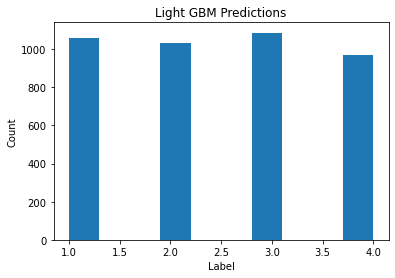

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
labels = pd.read_csv('./submission7.csv')
y_pred = labels.loc[:,'price']
plt.figure()
plt.hist(y_pred)
plt.title("Light GBM Predictions")
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()